In [1]:
import pandas as pd
import numpy as np
from IPython.display import Audio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
#from sklearn.cross_validation import StratifiedKFold
import librosa
import numpy as np
import scipy
"""
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras.layers import (Convolution1D, Dense, Dropout, GlobalAveragePooling1D, 
                          GlobalMaxPool1D, Input, MaxPool1D, concatenate)
from keras.utils import Sequence, to_categorical
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation)
from keras.utils import Sequence, to_categorical
from keras import backend as K

"""

'\nfrom keras import losses, models, optimizers\nfrom keras.activations import relu, softmax\nfrom keras.callbacks import (EarlyStopping, LearningRateScheduler,\n                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)\nfrom keras.layers import (Convolution1D, Dense, Dropout, GlobalAveragePooling1D, \n                          GlobalMaxPool1D, Input, MaxPool1D, concatenate)\nfrom keras.utils import Sequence, to_categorical\nfrom keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten,\n                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation)\nfrom keras.utils import Sequence, to_categorical\nfrom keras import backend as K\n\n'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#the audio file looks --- converted into -- Number format
import librosa
#What librosa does with audio data to convert into numerical format is
#---
#---
#It just samples the audio data and finds the frequency of that sample called as sampling frequency
#--
# Sample rate is KHZ "kilo hetz"
data,sample_rate=librosa.load("/content/drive/MyDrive/sample_audio_file.mp3")
#data consists of numerical data of the audio data
#sample rate consists of frequency by which samples are divided
print("shape of the audio data",data.shape)
print("Frequency rate of the sample",sample_rate)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


shape of the audio data (4255488,)
Frequency rate of the sample 22050


In [4]:
#Now the number of values in the data are == 4255488
#---
#---
#fundamentally 22050 is considered as best value fro sampleing
#---
#---
# so now divide the (len)/22050. to get the length of the audio or else number of melspectrograms we gonna get for a audio file
print("audio file length = ",data.shape[0]/sample_rate)

audio file length =  192.9926530612245


Text(0, 0.5, 'Amplitude')

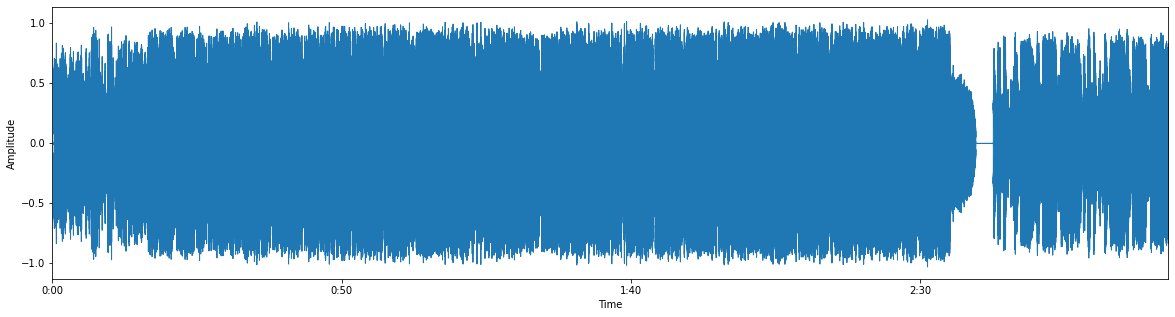

In [5]:
#step2 - produce sound_waves form the numerical data
from librosa.feature.spectral import poly_features
import matplotlib.pyplot as plt 
import librosa.display
plt.figure(figsize=(20,5))
librosa.display.waveplot(y=data,sr=sample_rate)
plt.ylabel("Amplitude")

In [6]:
print(data.shape)

(4255488,)


4096 114176
114688 478720
479232 782336
783360 1077760
1078272 2172928
2174976 2615296
2616320 2676736
2677248 3515904
3585536 3593728
3597824 3647488
3649536 4182016
4184576 4255488


Text(0, 0.5, 'Amplitude')

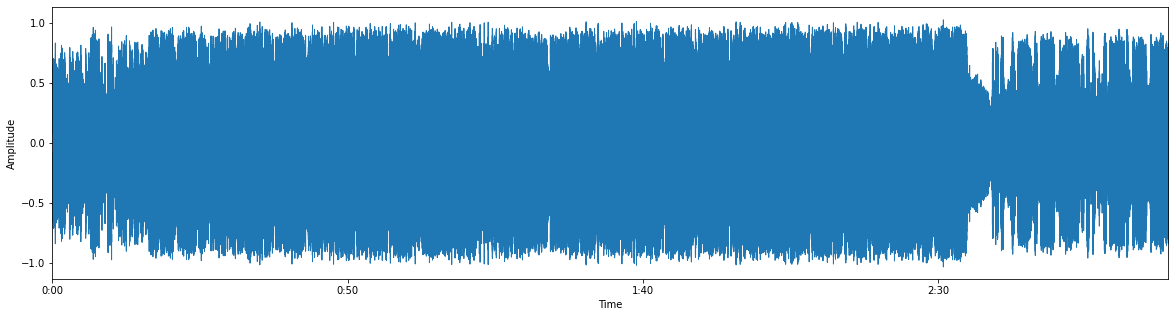

In [7]:
#removing the silence in the audio data
data_after_removing_silence=[]
Time_intervels=librosa.effects.split(data,top_db=15,ref=np.max).tolist()
for start,end in Time_intervels:
  print(start,end)
  data_after_removing_silence+=data.tolist()[start:end+1]
data_after_removing_silence=np.array(data_after_removing_silence)

#step2 - produce sound_waves form the numerical data
from librosa.feature.spectral import poly_features
import matplotlib.pyplot as plt 
import librosa.display
plt.figure(figsize=(20,5))
librosa.display.waveplot(y=data_after_removing_silence,sr=sample_rate)
plt.ylabel("Amplitude")

(4166923,)


Text(0, 0.5, 'Amplitude')

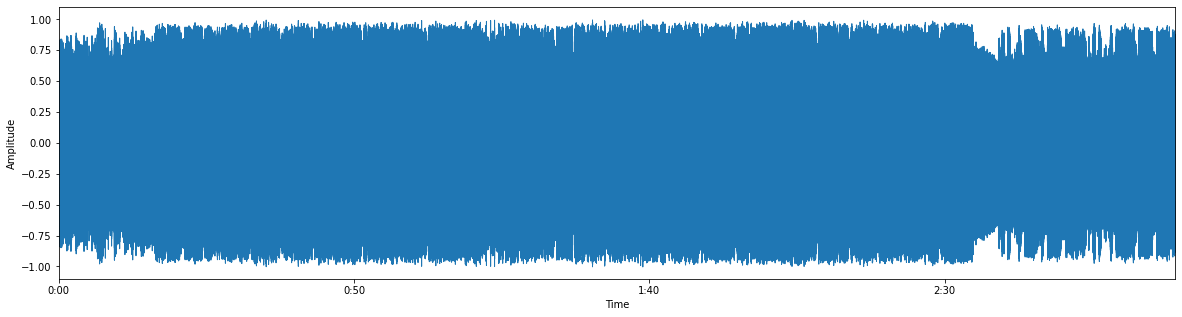

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scaled_data=scale.fit_transform(data_after_removing_silence.reshape(-1,1))
scaled_data=scaled_data.reshape(scaled_data.shape[0],)
print(scaled_data.shape)
from librosa.feature.spectral import poly_features
import matplotlib.pyplot as plt 
import librosa.display
plt.figure(figsize=(20,5))
librosa.display.waveplot(y=scaled_data,sr=sample_rate)
plt.ylabel("Amplitude")

#Terminology for audio data:

1. Amplitude --- (how loud the data was, better known as highest pitch point in the audio.

2. Frequency --- ( pitch of the audio)

3. Sample rate --- how many times the sample are taken for each second.
(example, if your audio file is off length 2.30 sec == 150 seconds, then total number of sample is 150*sample_rate ==> 150*22050.


In [10]:

# Mostly we use STFT (short time fourier transform) --
"""
It computes several Fourier transforms at different intervals and in doing so it preserves information about time and the way sound evolved 
it’s over time right and so the different intervals at which we perform the Fourier transform is given by the frame size and so.. 
a frame is a bunch of samples and so we fix the number of samples and we say let’s consider only for example 200 samples and do the 
Fourier transform there and then let’s move on to let’s shift and move on to to the rest lack of the waveform and what happens here is 
that we get a spectogram which gives us information of (time + frequency + magnitude)

basically, we have 190 seconds right, for each second we have 22050 sample, so what we do is we select random number of samples for diiferent 
numebr of times.

"""
# --> number of samples we gonna selecg is represented by hop_length
hop_length=500
# ---> window size indicates window for number of samples, n_fft
n_fft=1000
#now the hop length duration becomes:
hop_duration=float(hop_length/sample_rate)
print("hop duration is :",hop_duration)
#same goes with the window duration
n_fft_duration=float(n_fft/sample_rate)
print("window duration",n_fft_duration)


hop duration is : 0.022675736961451247
window duration 0.045351473922902494


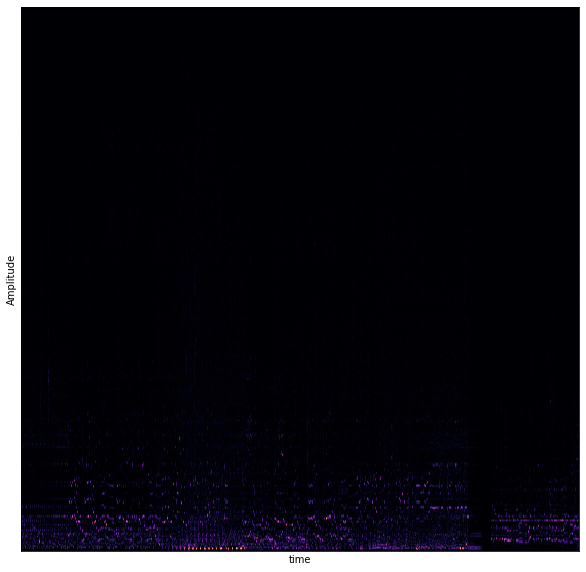

In [11]:
#perform STFT
short_term_FT=librosa.stft(data,n_fft=n_fft,hop_length=hop_length)
#do absoulte value for the fourier transform to get the pulse's of audio
spectrogram=np.abs(short_term_FT)
#plot the spectrogram
plt.figure(figsize=(10,10))
librosa.display.specshow(spectrogram,sr=sample_rate,hop_length=hop_length)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.show()


hop duration is : 0.022675736961451247
window duration 0.045351473922902494


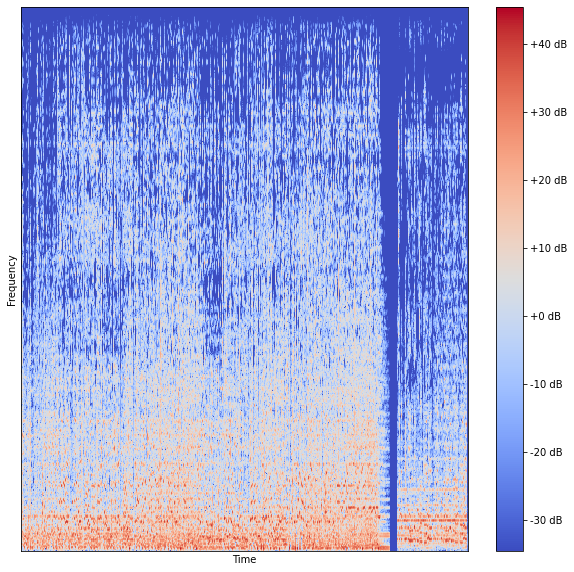

In [13]:

# --> number of samples we gonna selecg is represented by hop_length
hop_length=500
# ---> window size indicates window for number of samples, n_fft
n_fft=1000
#now the hop length duration becomes:
hop_duration=float(hop_length/sample_rate)
print("hop duration is :",hop_duration)
#same goes with the window duration
n_fft_duration=float(n_fft/sample_rate)
print("window duration",n_fft_duration)
#perform STFT
short_term_FT=librosa.stft(data,n_fft=n_fft,hop_length=hop_length)
#do absoulte value for the fourier transform 
#now let us visualize the same thing in decibels which is measure to show the sound::
db_spec=librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=(10,10))
librosa.display.specshow(db_spec,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.show()

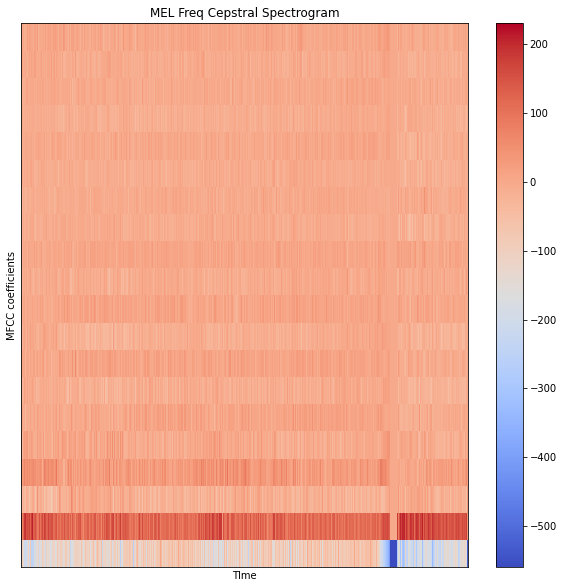

In [14]:
#Mel ferquency Cepstral Sepctrogram
#Need to selct mfcc value for getting mel frequency cepstral spectrogram
#usually the value of the mfcc is selced between 13 to 39. 
#so let us conside mfcc vlaue as 20
n_mfcc=20
mel_freq=librosa.feature.mfcc(data,sample_rate,n_fft=n_fft,n_mfcc=n_mfcc,hop_length=hop_length)
plt.figure(figsize=(10,10))
librosa.display.specshow(mel_freq,sr=sample_rate,hop_length=hop_length)
plt.xlabel("TIme")
plt.ylabel("MFCC coefficients")
plt.title("MEL Freq Cepstral Spectrogram")
plt.colorbar()
plt.show()

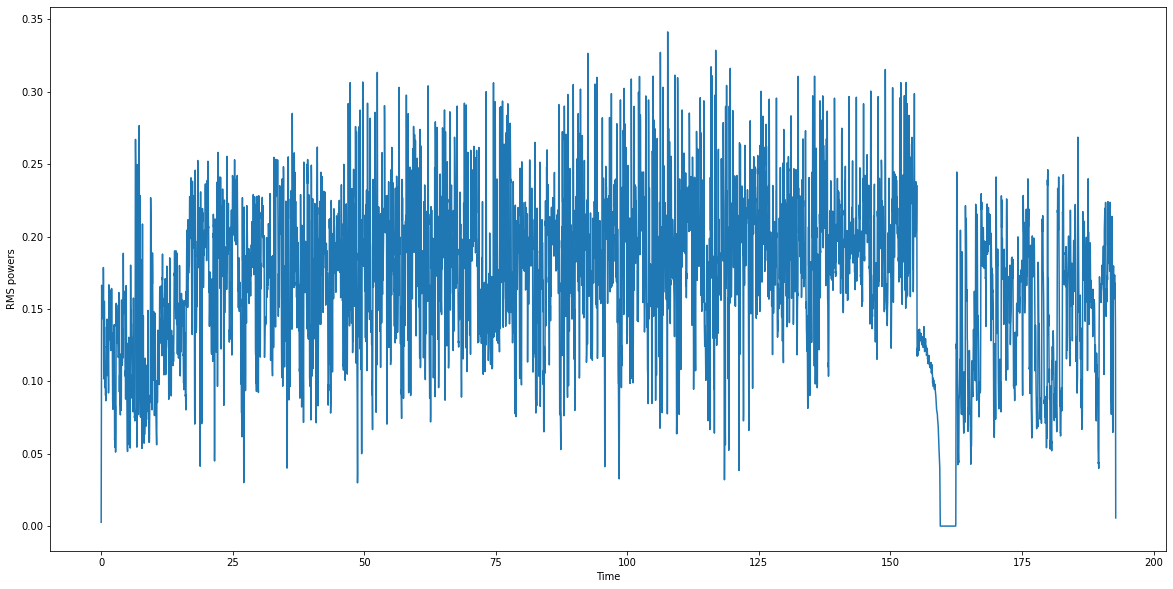

In [15]:
# RMS Energy graph visualization:
"""

RMSE:

The energy of a signal corresponds to its total magnitude. 
For audio signals this roughly characterizes how loud the signal is...
RMSE,a method of characterizing signal energy, calculates the square root of the mean square 
(the average of the squares of magnitude of the audio frames). 

Using a spectrogram can give us a more accurate representation of energy because its frames can be windowed. 
Therefore, if a spectrogram is already available, we prefer to run the RMS function over it

"""

sig,phase=librosa.magphase(librosa.stft(data))
sig_db=librosa.amplitude_to_db(sig,ref=np.max)
root_mean_square=librosa.feature.rms(S=sig)
T=librosa.times_like(root_mean_square)
plt.figure(figsize=(20,10))
plt.plot(T,root_mean_square[0])
plt.xlabel("Time")
plt.ylabel("RMS powers")
plt.show()

In [ ]:
print(mel_freq.shape)
#by running this cell we get the shape of mel_freq ---> usally it is (20,x).
# Here what we need to know is we need ot slect the number of values in the X need to be minimum which covers most ifno about audion data.


# Now we need to get till the mel_freq.

*   List item
*   List item

shape for every audio data file...

# once we reach this step then we can keep that as shape of the input and pass it to CNN models with target label

In [ ]:
#Mel ferquency Cepstral Sepctrogram
#Need to selct mfcc value for getting mel frequency cepstral spectrogram
#usually the value of the mfcc is selced between 13 to 39. 
#so let us conside mfcc vlaue as 20
n_mfcc=40
mel_freq=librosa.feature.mfcc(data,sample_rate,n_fft=n_fft,n_mfcc=n_mfcc,hop_length=hop_length)
plt.figure(figsize=(10,10))
librosa.display.specshow(mel_freq,sr=sample_rate,hop_length=hop_length)
plt.xlabel("TIme")
plt.ylabel("MFCC coefficients")
plt.title("MEL Freq Cepstral Spectrogram")
plt.colorbar()
plt.show()

In [ ]:
data.shape

In [ ]:

def read_audio(conf, pathname, trim_long_data):
    y, sr = librosa.load(pathname, sr=conf.sampling_rate)
    if 0 < len(y): 
        y, _ = librosa.effects.trim(y) 
    if len(y) > conf.samples: 
        if trim_long_data:
            y = y[0:0+conf.samples]
    else:
        padding = conf.samples - len(y)    
        offset = padding // 2
        y = np.pad(y, (offset, conf.samples - len(y) - offset), 'constant')
    return y
class conf:
    sampling_rate = 44100
    duration = 4
    hop_length = 300
    fmin = 20
    fmax = sampling_rate // 2
    n_mels = 128
    n_fft = n_mels * 20
    samples = sampling_rate * duration
def audio_to_melspectrogram(conf, audio):
    spectrogram = librosa.feature.melspectrogram(audio, 
                                                 sr=conf.sampling_rate,
                                                 n_mels=conf.n_mels,
                                                 hop_length=conf.hop_length,
                                                 n_fft=conf.n_fft,
                                                 fmin=conf.fmin,
                                                 fmax=conf.fmax)
    spectrogram = librosa.power_to_db(spectrogram)
    spectrogram = spectrogram.astype(np.float32)
    return spectrogram

#This implement the previous two function for one file
def read_as_melspectrogram(conf, pathname, trim_long_data, debug_display=False):
    x = read_audio(conf, pathname, trim_long_data)
    mels = audio_to_melspectrogram(conf, x)
    if debug_display:
        IPython.display.display(IPython.display.Audio(x, rate=conf.sampling_rate))
        show_melspectrogram(conf, mels)
    return mels

#This generalizes for all the audio files you have
def convert_wav_to_image(df, source):
    import pandas as pd
    X=[]
    x1=df.primary_label.value_counts().index.tolist()
    c1=0
    for i in x1:
      c=1
      print(i)
      path= source+i+"/"
      for j in os.listdir(path):
        print(j)
        x = read_as_melspectrogram(conf, path+j, trim_long_data=True)
        X.append(x.transpose())
        if c==1: break
      break
    return X

#data preparation

In [ ]:
#Function for prepartion of the train data in the sahpe needed for convolution neural nets
import math
def data_preparation(data,configuration,dir_path):
  X=np.empty(shape=(len(data),configuration.dim[0],configuration.dim[1],1))
  input_length=configuration.audio_length
  for i,fname in enumerate(data.filename):
    file_path=dir_path+"/"+fname
    audio_data,sampling_rate1=librosa.core.load(file_path,sr=configuration.sampling_rate,res_type="kaiser_fast")
    #self.audio_duration=math.floor(len(audio_data)/sampling_rate1) 
    if len(audio_data)>input_length:
      max_offset=len(audio_data)-input_length
      offset=np.random.randint(max_offset)
      audio_data=audio_data[offset:(input_length+offset)]
    else:
      if input_length>len(audio_data):
        max_offset=input_length-len(audio_data)
        offset=np.random.randint(max_offset)
      else:
        offset=0
      audio_data=np.pad(audio_data,(offset,input_length-len(audio_data),"constant"))
    audio_data=librosa.feature.mfcc(audio_data,sr=configuration.sampling_rate1,n_mfcc=configuration.n_mfcc)
    audio_data=np.expand_dims(audio_data,axis=-1)
    X[i,]=audio_data 
  return X




In [ ]:
#Set the config file 
class Config(object):
    def __init__(self,sampling_rate=16000, audio_duration=2, n_classes=give our target labels count,use_mfcc=True, n_folds=10, learning_rate=0.0001, max_epochs=50, n_mfcc=20):
        self.sampling_rate = sampling_rate
        self.audio_duration = audio_duration
        self.n_classes = n_classes
        self.use_mfcc = use_mfcc
        self.n_mfcc = n_mfcc
        self.n_folds = n_folds
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

        self.audio_length = self.sampling_rate * self.audio_duration
        if self.use_mfcc:
            self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)
        else:
            self.dim = (self.audio_length, 1)
configuration=Config(sampling_rate=22000, audio_duration=10, n_folds=10, learning_rate=0.001, use_mfcc=True, n_mfcc=40)



In [ ]:
#model building
def model_builder(configuration):
  target=configuration.n_classes
  input_length=config.audio_length 
  #create a input layer with the shape of input_length
  input=Input(shape=(input_length),1)
  #create convolution_network
  #layer1 ---  for every layer there is extension (x) which means everything is interconnected

  x = Convolution1D(16, 9, activation=relu, padding="valid")(inp)
  x = Convolution1D(16, 9, activation=relu, padding="valid")(x)
  x = MaxPool1D(16)(x)
  x = Dropout(rate=0.1)(x)
  #layer2   
  x = Convolution1D(32, 3, activation=relu, padding="valid")(x)
  x = Convolution1D(32, 3, activation=relu, padding="valid")(x)
  x = MaxPool1D(4)(x)
  x = Dropout(rate=0.1)(x)
  #layer3  
  x = Convolution1D(32, 3, activation=relu, padding="valid")(x)
  x = Convolution1D(32, 3, activation=relu, padding="valid")(x)
  x = MaxPool1D(4)(x)
  x = Dropout(rate=0.1)(x)
  #layer4  
  x = Convolution1D(256, 3, activation=relu, padding="valid")(x)
  x = Convolution1D(256, 3, activation=relu, padding="valid")(x)
  x = GlobalMaxPool1D()(x)
  x = Dropout(rate=0.2)(x)
  #output _ layers
  x = Dense(64, activation=relu)(x)
  x = Dense(1028, activation=relu)(x)
  out = Dense(nclass, activation=softmax)(x)
  #final_model
  model=models.Model(inputs=inp,output=out)
  optimizer=optimizers.Adam(configuration.learning_rate)
  model.compile(optimizer=optimizer,loss=losses.categorical_crossentropy,metrics=["acc"])
  return model


In [ ]:
#model fitter code and saving the model
#
#
#step - 1, prepare the target data
classes=list(df.target_clss_name.unique())
#give the class name in your dataset
#now do ordinal encoding to this to generate the target list
dic1={class_name : i  for i,class_name in enumerate(classes)}
#apply this dictionary to the data csv file
data["class_encoded"]=data["traget_class_name"].apply(lambda x: dic1[x])
#
#
#step-2 do model compiling
#
#
#before that we do kfold apparoch to pick the best
folding=StratifiedkFold(data.class_encoded,n_folds=configuration.n_folds)
for i, (p_train_split,p_val_split) in enumerate(folding):
  train=data.iloc[p_train_split]
  val=data.iloc[p_val_split]
  checkpoint = ModelCheckpoint('best_%d.h5'%i, monitor='val_loss', verbose=1, save_best_only=True)
  early = EarlyStopping(monitor="val_loss", mode="min", patience=5)
  tb = TensorBoard(log_dir='./logs/' + PREDICTION_FOLDER + '/fold_%d'%i, write_graph=True)
  callbacks_list = [checkpoint, early, tb]
  print("#"*50)
  print("Fold: ", i)
  model = get_2d_conv_model(config)
  history = model.fit(X, y, validation_data=(X_val, y_val), callbacks=callbacks_list, 
                        batch_size=64, epochs=config.max_epochs)
  model.load_weights('best_%d.h5'%i)

    # Save train predictions
  predictions = model.predict(X_train, batch_size=64, verbose=1)
  np.save(PREDICTION_FOLDER + "/train_predictions_%d.npy"%i, predictions)



In [ ]:
import numpy as np 
import pandas as pd
import glob
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import Model,layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/data_au copy.csv")

In [ ]:

df.head()

,Unnamed: 0,primary_label,secondary_labels,filename,duration,n_chunks,mfcc
0,0,afrsil1,[],afrsil1/XC125458.ogg,11.102031,2,"tensor([-58.3184, 21.6816, 12.9708, 11.8058..."
1,1,afrsil1,"['houspa', 'redava', 'zebdov']",afrsil1/XC175522.ogg,47.020406,9,"tensor([-65.0098, -65.0098, -65.0098, -65.0098..."
2,2,afrsil1,[],afrsil1/XC177993.ogg,53.760000,10,"tensor([-7.5244e+01, -7.5244e+01, -7.5244e+01,..."
3,3,afrsil1,[],afrsil1/XC205893.ogg,105.482438,21,"tensor([-65.7417, 14.0324, 14.2583, 10.2913..."
4,4,afrsil1,[],afrsil1/XC207431.ogg,3.395906,0,"tensor([-72.0879, -72.0879, -72.0879, 7.9121..."


In [ ]:
#df["mfcc"]=df["mfcc"].apply(lambda x: tf.constant(x))

In [ ]:
x=df["mfcc"].iloc[0]


In [ ]:
def changer_back(x):
  x=x[8:-2].split(",")
  res=[]
  for i in x:
    i=float(i.strip())
    res.append(i)
  return np.array(res)
df["mfcc"]=df["mfcc"].apply(lambda x: changer_back(x))


In [ ]:
train=np.array(df["mfcc"].tolist())

In [ ]:
target=pd.get_dummies(df.primary_label.values)

In [ ]:
train=train.reshape(14851,20)
train.shape

(14851, 20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train,target,random_state=45,test_size=0.1)

In [ ]:
Y_train.shape

(13365, 151)

In [ ]:
#heatmapmodel=Sequential()
 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(mel_freq,cmap="hot",interpolation="nearest")
plt.show()


In [ ]:
def peak_plot(y, sr, FMIN=500, FMAX=12500):
    # PCEN spec
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    melspec = librosa.feature.melspectrogram(y, sr=sr,
        fmin=FMIN, fmax=FMAX, n_mels=64)
    pcen = librosa.core.pcen(melspec, sr=sr,
        gain=0.8, bias=10, power=0.25, time_constant=0.06, eps=1e-06)
    librosa.display.specshow(pcen, sr=sr,
        fmin=FMIN, fmax=FMAX,
        x_axis='time', y_axis='mel', cmap='magma_r')
    # plt.title('PCEN-based SNR')
    plt.tight_layout()

    # SNR and a smoothed SNR with kernel 15
    plt.subplot(3, 1, 2)
    pcen_snr = np.max(pcen,axis=0) - np.min(pcen,axis=0)
    pcen_snr = librosa.power_to_db(pcen_snr / np.median(pcen_snr))
    median_pcen_snr = scipy.signal.medfilt(pcen_snr, kernel_size=15)
    times = np.linspace(0, len(y)/sr, num=melspec.shape[1])
    plt.plot(times, pcen_snr, color="orange")
    plt.plot(times, median_pcen_snr, color="blue")
    plt.xlim(times[0], times[-1])
    plt.ylim(0, 10)
    # And go through, picking some peaks
    for i in range(12):
        t_peak = np.argmax(median_pcen_snr)
        plt.scatter(times[t_peak], median_pcen_snr[t_peak], c='red', zorder=100)
        median_pcen_snr[t_peak-50:t_peak+50] = 0 # zero out around the peak to find the next one

    # Kernel 55 for even smoother (bad idea?)
    plt.subplot(3, 1, 3)
    median_pcen_snr = scipy.signal.medfilt(pcen_snr, kernel_size=55)
    times = np.linspace(0, len(y)/sr, num=melspec.shape[1])
    plt.plot(times, median_pcen_snr, color="blue")
    plt.xlim(times[0], times[-1])
    plt.ylim(0, 10)
    # And go through, picking some peaks
    for i in range(12):
        t_peak = np.argmax(median_pcen_snr)
        plt.scatter(times[t_peak], median_pcen_snr[t_peak], c='red', zorder=100)
        median_pcen_snr[t_peak-50:t_peak+50] = 0 # zero out around the peak to find the next one